<a href="https://colab.research.google.com/github/Andres92DS/DS1Coderhouse/blob/main/Entrega_Final_DS1_Andres_Avila_Chacon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Predicción de Precios de Bienes Raíces:

Datos inmobiliarios  de la ciudad de Santiago de Chile que incluyan características de la propiedad, ubicación y precio de venta.

Modelar y predecir precios, identificar factores influyentes en los precios de bienes raíces.

**Hipótesis Planteada:**
El precio de las propiedades inmobiliarias en Santiago puede estar influenciado por factores como la ubicación/Comuna, el tamaño de la propiedad y el número de dormitorios y baños.

**Preguntasde Interés sobre el Dataset:**

¿Existe una relación entre el precio de las propiedades y la ubicación (comuna)?

¿Cómo varía el precio de las propiedades en función del tamaño de la propiedad (área construida y área total)?

¿Hay una relación entre el precio de las propiedades y el número de dormitorios , baños y parking?

#Meta Data
Datos sacados a través de un Web Scrape a https://chilepropiedades.cl/

Este dataset solo contiene CASAS en venta. No incluye departamentos o terrenos.

Al ser un Web Scrape es muy posible que hayan avisos cuya información fue ingresada incorrectamente. ej: Una casa con 100 km2 de terreno.

link dataset
https://www.kaggle.com/datasets/luisfelipetn/valor-casas-usadas-chile-rm-08032023?resource=download

Contenidos
Este dataset contiene 12 columnas

-Price_CLP: Precio de casa en pesos chilenos (CLP)

-Price_UF: Precio de casa en unidades de fomento (UF)

-Price_USD: Precio de casa en dolares americanos (USD)

-Comuna: Comuna en la que se encuentra la casa.

-Ubicacion: Ubicación más específica de la casa

-Dorms: Cuantas habitaciones tiene la casa

-Baths: Cuantos baños tiene la casa

-Built Area: Cuantos metros cuadrados construidos tiene la casa

-Total Area: Cuantos metros cuadrados tiene toda la propiedad

-Parking: Cuantos estacionamentos tiene la casa

-id: Codigo de la casa en https://chilepropiedades.cl/ ; Ej: https://chilepropiedades.cl/ver-publicacion/11607213

-Realtor: El corredor de bienes raíces

#Importar Dataset


In [ ]:
#Pandas es la librería básica para la manipulación y análisis de datos
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

# Ruta relativa desde la carpeta montada
file_path = '/content/drive/MyDrive/PROYECTO DATA SCIENCIE 1/2023-03-08 Precios Casas RM.csv'
# Cargar el DataFrame
df = pd.read_csv('/content/drive/MyDrive/PROYECTO DATA SCIENCIE 1/2023-03-08 Precios Casas RM.csv')
# Especificar el separador (;) al cargar el DataFrame
df = pd.read_csv('/content/drive/MyDrive/PROYECTO DATA SCIENCIE 1/2023-03-08 Precios Casas RM.csv', sep=';')
# Reiniciar el índice
df = df.reset_index(drop=True)

In [ ]:
df.head()

,Price_CLP,Price_UF,Price_USD,Comuna,Ubicacion,Dorms,Baths,Built Area,Total Area,Parking,id,Realtor
0,409285000,11500,509695,QuintaNormal,Hoevel4548y4558,7,4.0,384.0,732.0,3.0,11700213,NaN
1,105000000,2950,130760,PedroAguirreCerda,Rucalhue,2,1.0,112.0,145.0,1.0,10894299,Legales y Propiedades SpA
2,128124000,3600,159557,EstaciónCentral,AvenidaLasParcelas,3,1.0,59.0,243.0,2.0,10257635,Propiedadesrs
3,75000000,2107,93400,Colina,PasajeGonzaloRojas,3,1.0,103.0,73.0,1.0,9232092,Patricio Gajardo propiedades
4,53000000,1489,66002,Colina,HernánDíazArrieta2820,2,1.0,57.0,67.0,1.0,7085397,Patricio Gajardo propiedades


In [ ]:
#generar un shape para validar dimensiones del Dataset
df.shape

(7779, 12)

In [ ]:
#validamos listado columnas
df.columns

Index(['Price_CLP', 'Price_UF', 'Price_USD', 'Comuna', 'Ubicacion', 'Dorms',
       'Baths', 'Built Area', 'Total Area', 'Parking', 'id', 'Realtor'],
      dtype='object')

In [ ]:
#validamos las columnas, la cantidad de datos nulos y el tipo de formato
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7779 entries, 0 to 7778
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Price_CLP   7779 non-null   int64  
 1   Price_UF    7779 non-null   int64  
 2   Price_USD   7779 non-null   int64  
 3   Comuna      7779 non-null   object 
 4   Ubicacion   7779 non-null   object 
 5   Dorms       7779 non-null   int64  
 6   Baths       7714 non-null   float64
 7   Built Area  7533 non-null   float64
 8   Total Area  7571 non-null   float64
 9   Parking     5489 non-null   float64
 10  id          7779 non-null   int64  
 11  Realtor     7184 non-null   object 
dtypes: float64(4), int64(5), object(3)
memory usage: 729.4+ KB


In [ ]:
df.describe()

,Price_CLP,Price_UF,Price_USD,Dorms,Baths,Built Area,Total Area,Parking,id
count,7.779000e+03,7779.000000,7.779000e+03,7779.000000,7714.000000,7533.000000,7571.000000,5489.000000,7.779000e+03
mean,3.642481e+08,10234.571153,4.536091e+05,3.994087,2.653746,229.923669,807.919826,2.980506,9.910828e+06
std,3.868810e+08,10870.491584,4.817945e+05,1.622821,1.465103,1676.898812,9050.893115,17.749384,2.046317e+06
min,2.085000e+03,0.000000,3.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.213620e+06
25%,1.200000e+08,3372.000000,1.494400e+05,3.000000,2.000000,85.000000,129.500000,1.000000,8.563078e+06
50%,2.050000e+08,5760.000000,2.552930e+05,4.000000,2.000000,128.000000,210.000000,2.000000,1.054807e+07
75%,4.911420e+08,13800.000000,6.116340e+05,5.000000,3.000000,200.000000,443.000000,3.000000,1.152463e+07
max,5.516450e+09,155000.000000,6.869801e+06,27.000000,29.000000,120000.000000,678000.000000,1269.000000,1.234149e+07


#EDA - Análisis exploratorio de datos

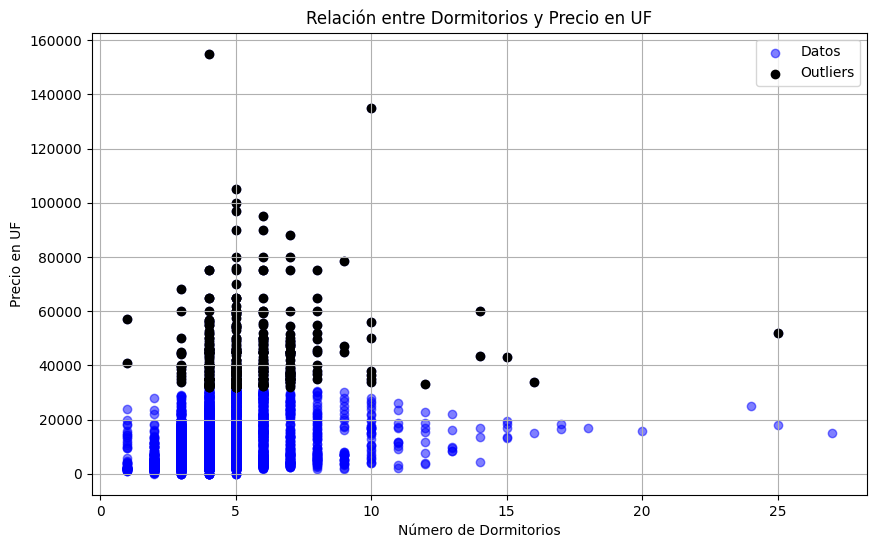

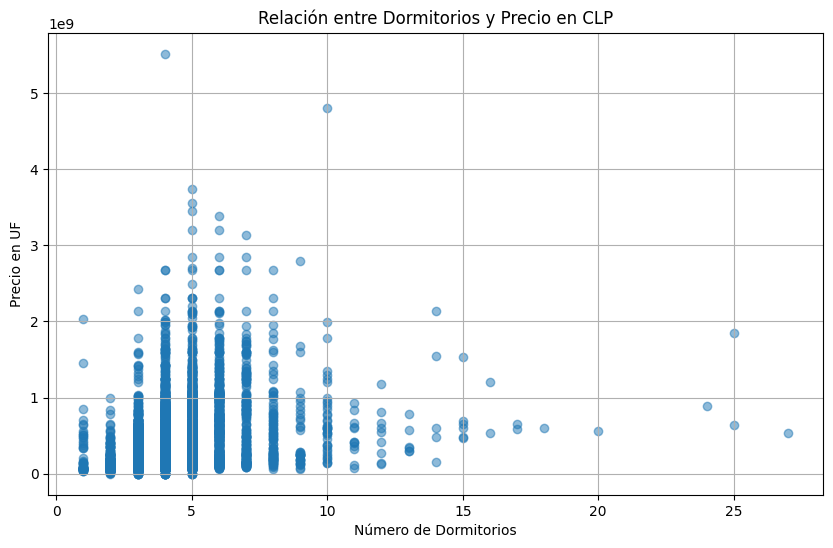

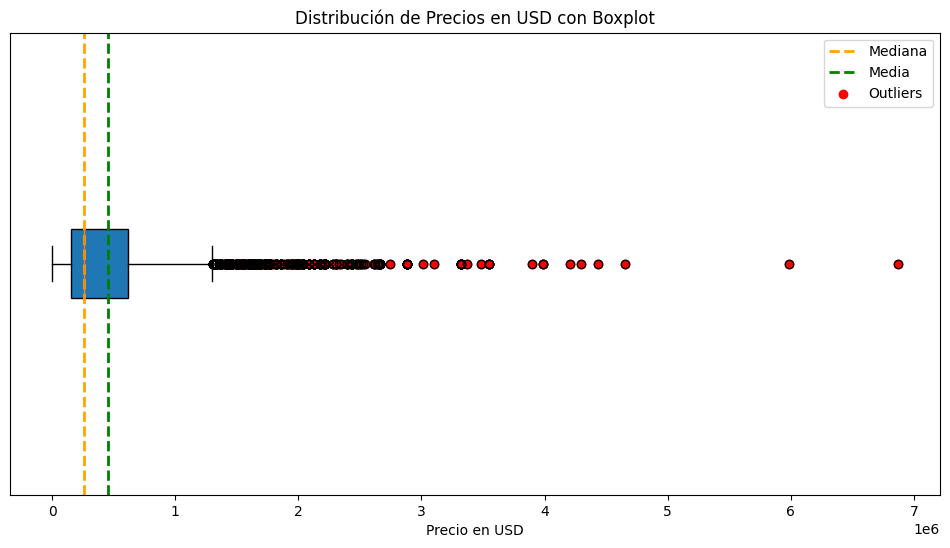

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


# GRAFICOS EN MATPLOTLIB
# Gráfico de dispersión entre Dorms y Precio en UF
plt.figure(figsize=(10, 6))

# función para identificar outliers
def identify_outliers(data, threshold=2):
    z_scores = (data - np.mean(data)) / np.std(data)
    return np.abs(z_scores) > threshold

# Identificar outliers en Precio en UF
outliers = identify_outliers(df['Price_UF'])

# Crear el gráfico de dispersión
plt.scatter(df['Dorms'], df['Price_UF'], alpha=0.5, color='blue', label='Datos')
plt.scatter(df['Dorms'][outliers], df['Price_UF'][outliers], color='black', label='Outliers')

plt.title('Relación entre Dormitorios y Precio en UF')
plt.xlabel('Número de Dormitorios')
plt.ylabel('Precio en UF')
plt.grid(True)

# Añadir leyenda
plt.legend()

plt.show()

# Gráfico dorms y precio clp
plt.figure(figsize=(10, 6))
plt.scatter(df['Dorms'], df['Price_CLP'], alpha=0.5)
plt.title('Relación entre Dormitorios y Precio en CLP')
plt.xlabel('Número de Dormitorios')
plt.ylabel('Precio en UF')
plt.grid(True)
plt.show()
# Establecer el tamaño de la figura
plt.figure(figsize=(12, 6))

# Crear un gráfico de caja para precio USD
boxplot = plt.boxplot(df['Price_USD'], vert=False, patch_artist=True)

# Añadir una línea para marcar la mediana
plt.axvline(df['Price_USD'].median(), color='orange', linestyle='dashed', linewidth=2, label='Mediana')
# Calcular y agregar la media
media_precio_usd = df['Price_USD'].mean()
plt.axvline(media_precio_usd, color='green', linestyle='dashed', linewidth=2, label='Media')
# Identificar los outliers y resaltarlos en rojo
outliers = df['Price_USD'][df['Price_USD'] > df['Price_USD'].quantile(0.95)]
plt.scatter(outliers, [1] * len(outliers), color='red', label='Outliers')

# Añadir título y etiquetas
plt.title('Distribución de Precios en USD con Boxplot')
plt.xlabel('Precio en USD')
plt.yticks([])  # Ocultar el eje y

# Añadir leyenda
plt.legend()

# Mostrar el gráfico
plt.show()

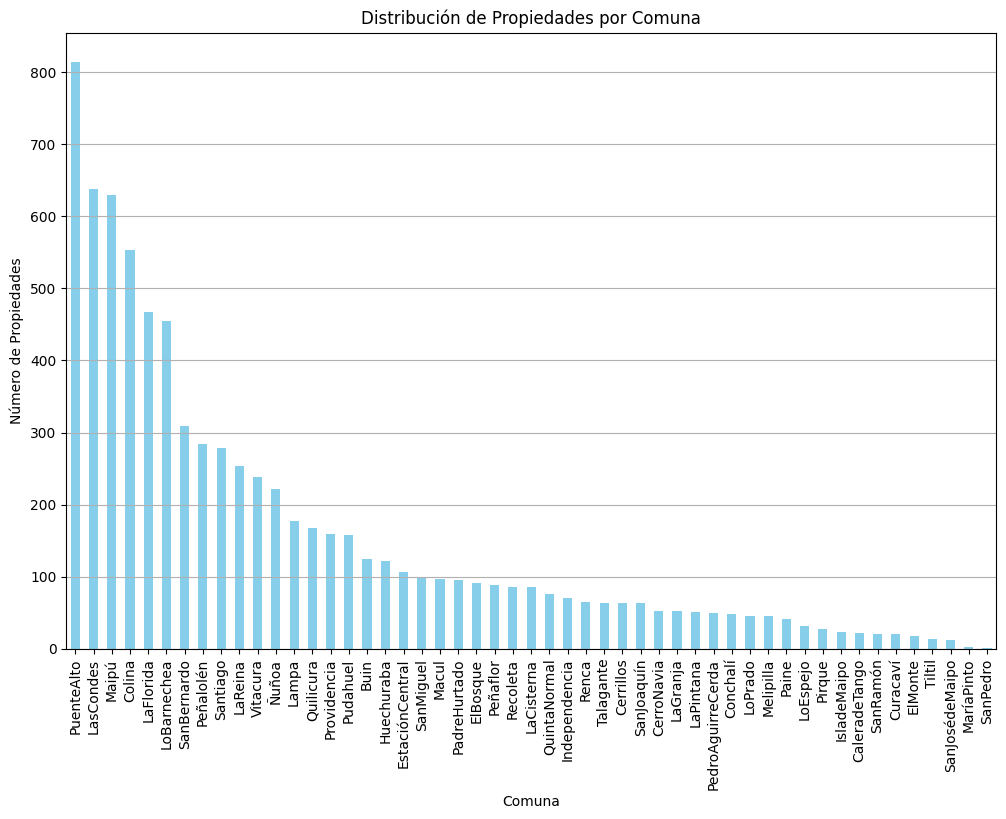

In [ ]:
# Gráfico de barras de la distribución de Comunas
plt.figure(figsize=(12, 8))
df['Comuna'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribución de Propiedades por Comuna')
plt.xlabel('Comuna')
plt.ylabel('Número de Propiedades')
plt.grid(axis='y')
plt.show()

In [ ]:
# Obtener la frecuencia de valores en una columna cualitativa (por ejemplo, 'Comuna')
frecuencia_comuna = df['Comuna'].value_counts()

# Mostrar la frecuencia de valores
print(frecuencia_comuna)

PuenteAlto           814
LasCondes            638
Maipú                630
Colina               553
LaFlorida            467
LoBarnechea          455
SanBernardo          309
Peñalolén            284
Santiago             279
LaReina              253
Vitacura             238
Ñuñoa                222
Lampa                177
Quilicura            168
Providencia          159
Pudahuel             158
Buin                 125
Huechuraba           122
EstaciónCentral      106
SanMiguel             99
Macul                 97
PadreHurtado          96
ElBosque              91
Peñaflor              89
Recoleta              86
LaCisterna            85
QuintaNormal          76
Independencia         70
Renca                 65
Talagante             64
Cerrillos             64
SanJoaquín            63
CerroNavia            53
LaGranja              53
LaPintana             51
PedroAguirreCerda     49
Conchalí              48
LoPrado               46
Melipilla             45
Paine                 41


GRAFICOS BIBLOTECA SEABORN

<ipython-input-7-56db19b329b3>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=precio_promedio_por_comuna.values, y=precio_promedio_por_comuna.index, palette='viridis')


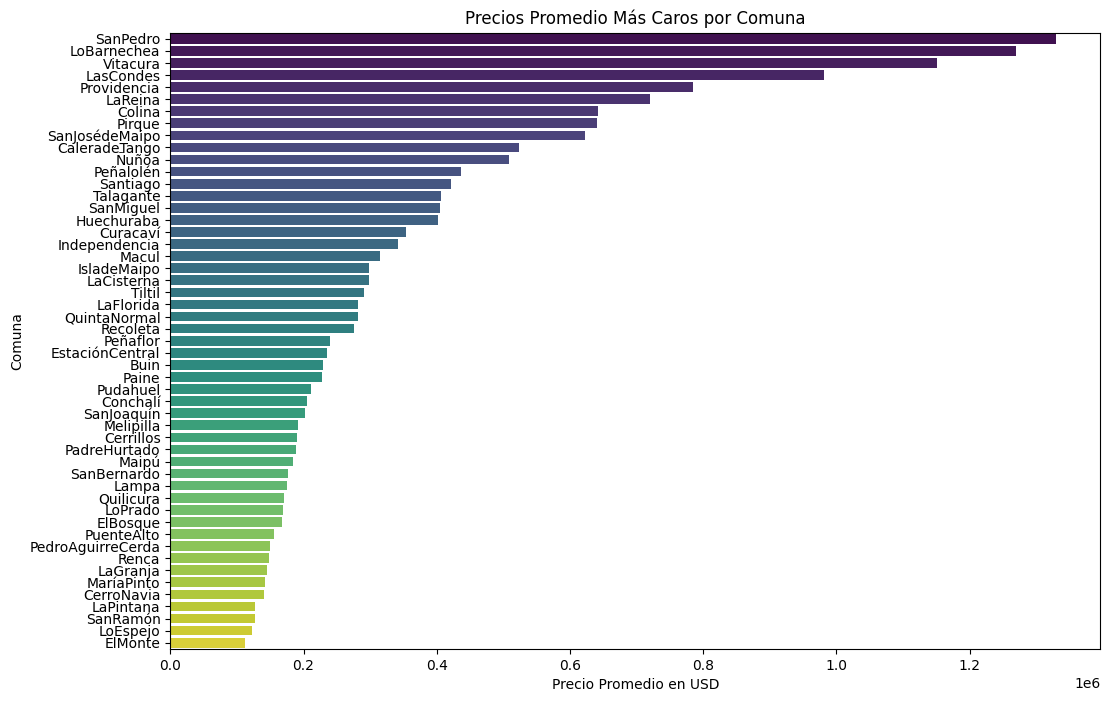

<ipython-input-7-56db19b329b3>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='Price_USD', y='Comuna', data=df, palette='viridis')


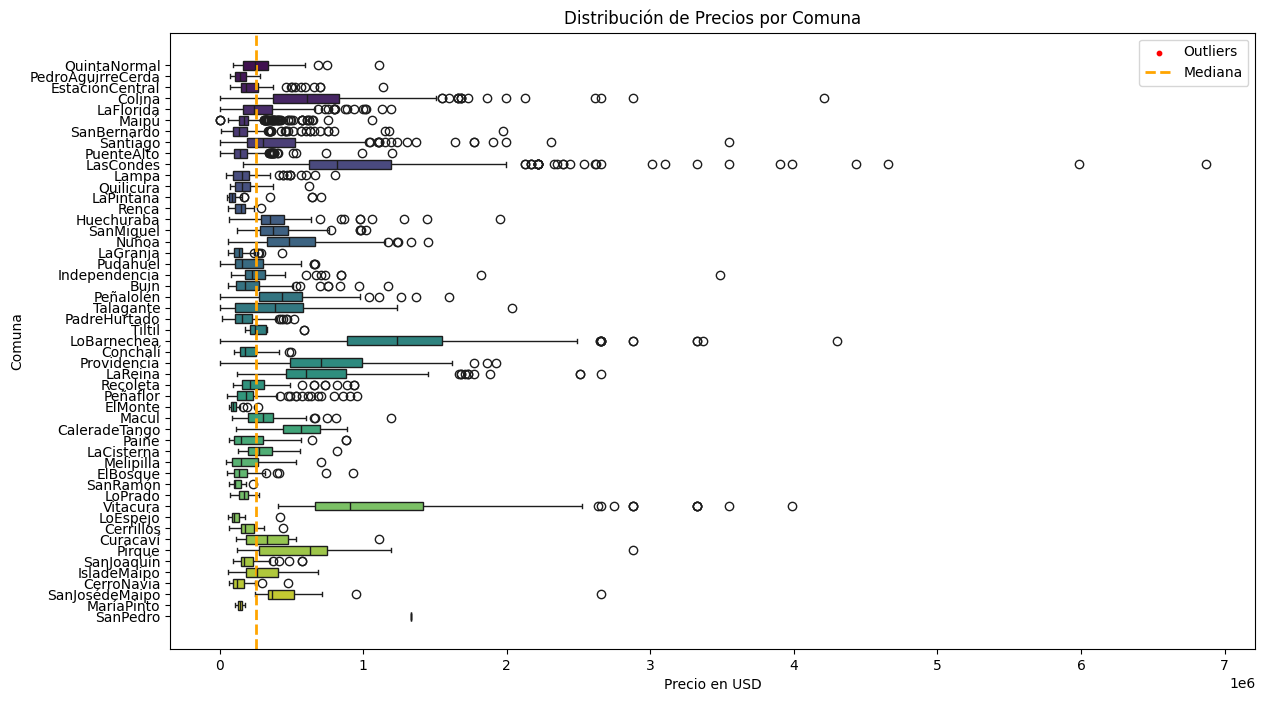

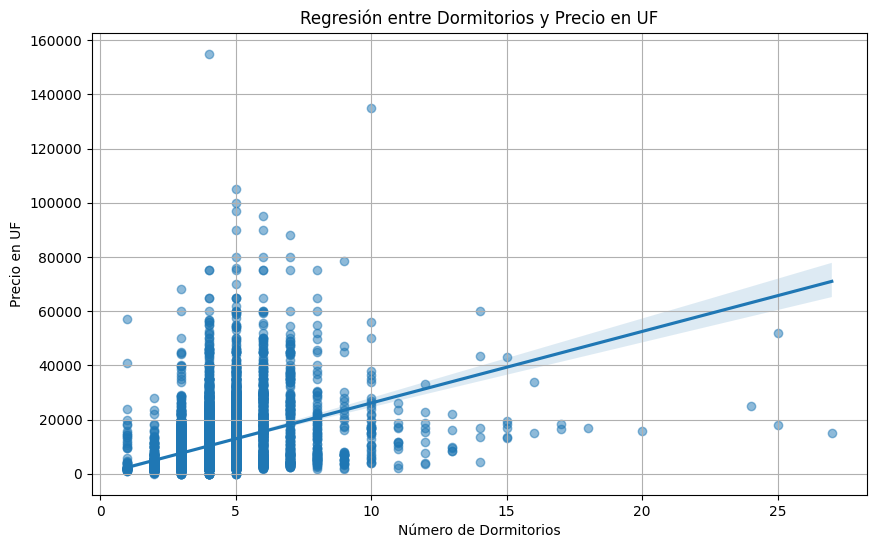

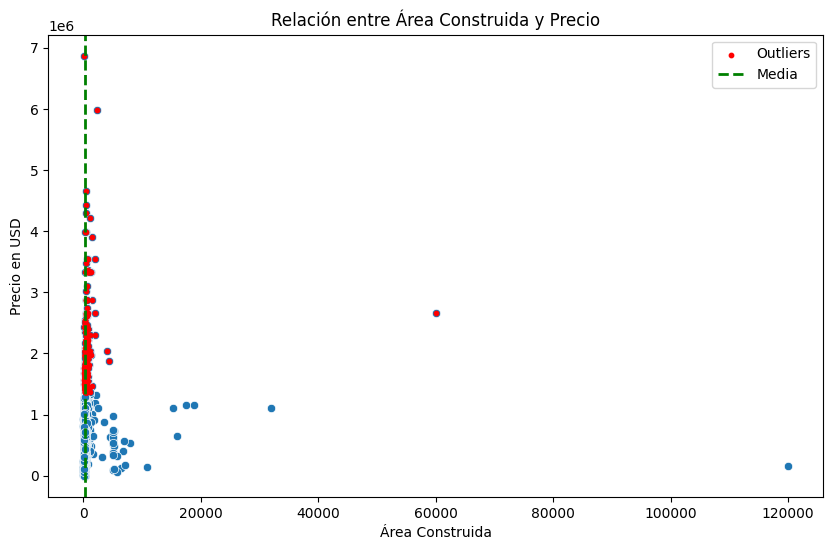

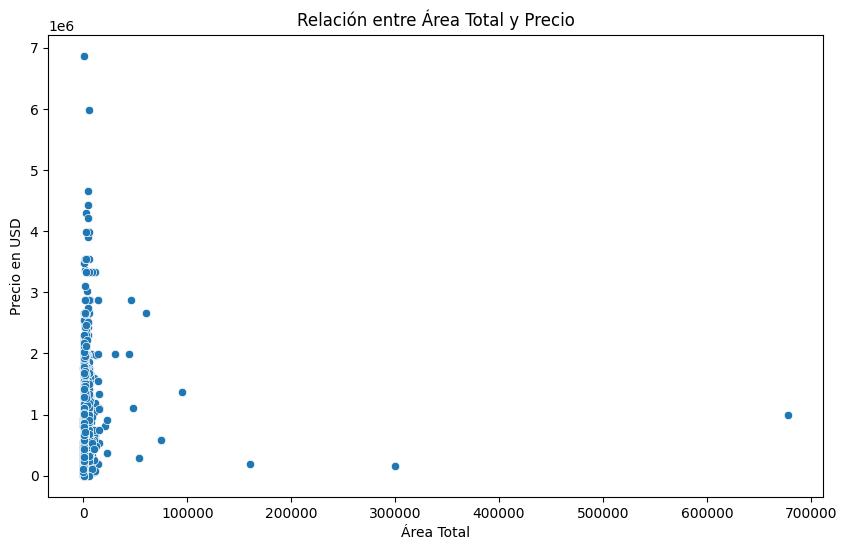

<ipython-input-7-56db19b329b3>:72: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='Dorms', y='Price_USD', data=df, palette='viridis')


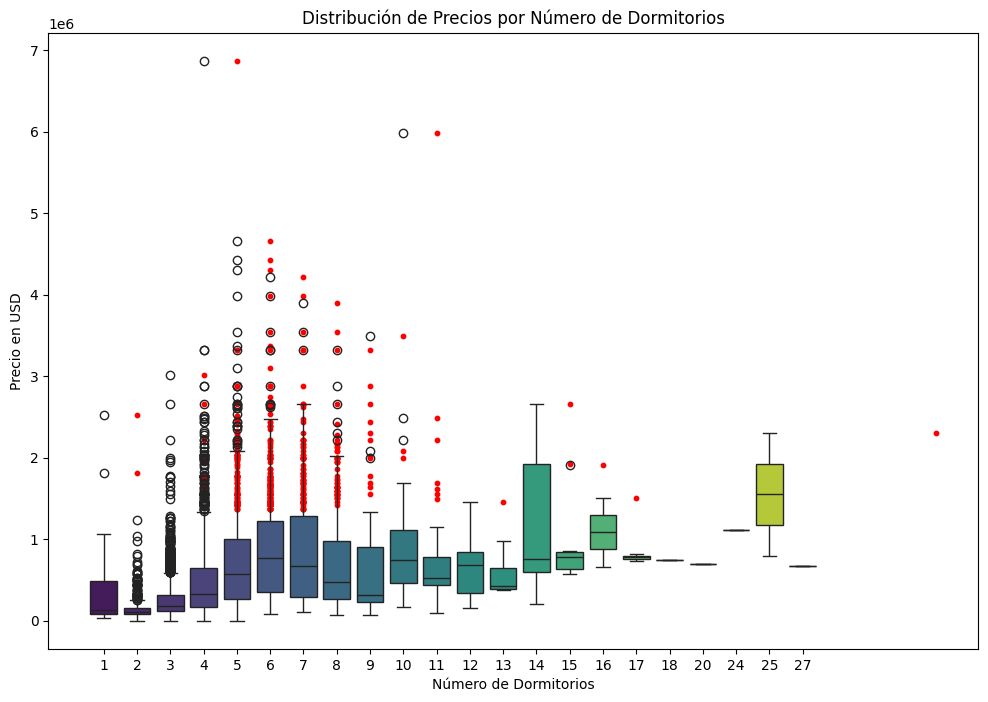

<ipython-input-7-56db19b329b3>:85: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Baths', y='Price_USD', data=df, palette='viridis')


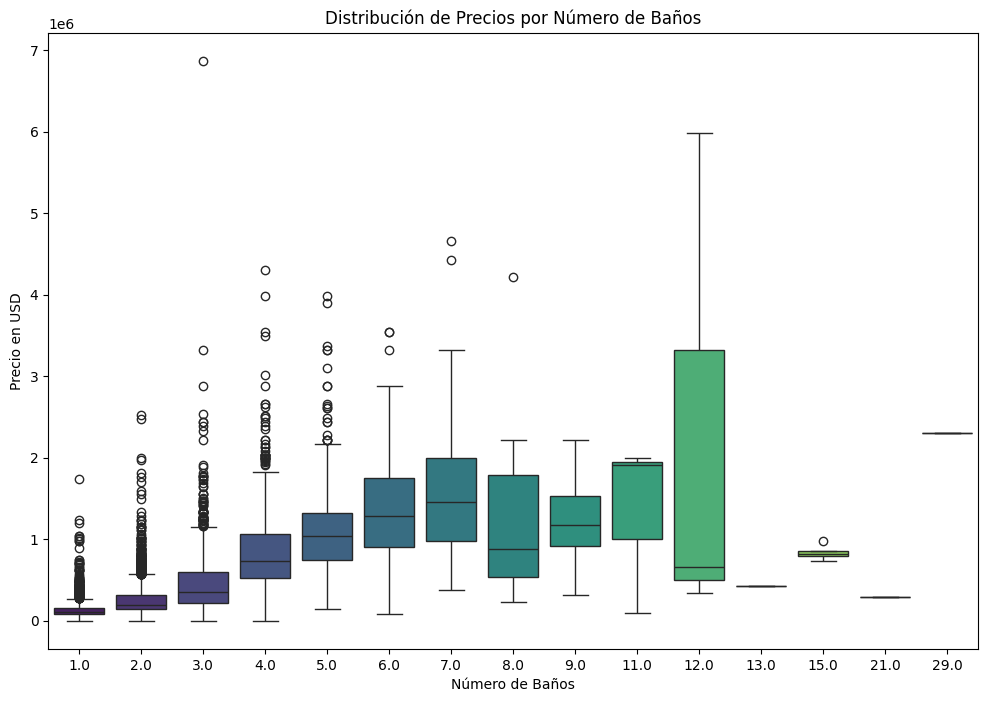

<ipython-input-7-56db19b329b3>:93: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Parking', y='Price_USD', data=df, palette='viridis')


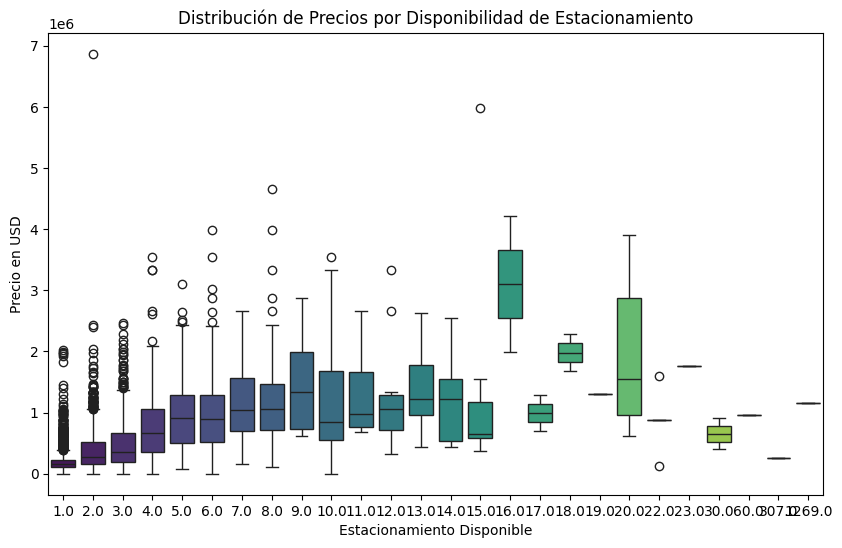

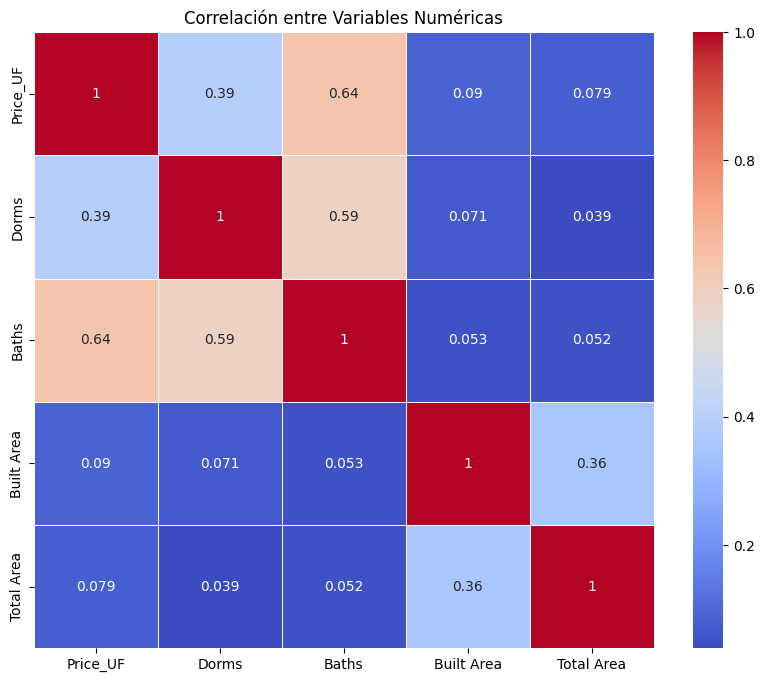

In [ ]:
import seaborn as sns
# Calcular el precio promedio por comuna
precio_promedio_por_comuna = df.groupby('Comuna')['Price_USD'].mean().sort_values(ascending=False)

# Crear un gráfico de barras
plt.figure(figsize=(12, 8))
sns.barplot(x=precio_promedio_por_comuna.values, y=precio_promedio_por_comuna.index, palette='viridis')

# Añadir etiquetas y título
plt.xlabel('Precio Promedio en USD')
plt.ylabel('Comuna')
plt.title('Precios Promedio Más Caros por Comuna')

# Mostrar el gráfico
plt.show()

# Boxplot para distribución de precios por comuna
plt.figure(figsize=(14, 8))
ax = sns.boxplot(x='Price_USD', y='Comuna', data=df, palette='viridis')

# Identificar outliers y resaltar en rojo
outliers = df.groupby('Comuna')['Price_USD'].apply(lambda x: x[x > x.quantile(0.95)])
for tick, label in zip(ax.get_yticks(), ax.get_yticklabels()):
    comunas_outliers = outliers[outliers.index == label.get_text()]
    ax.scatter(comunas_outliers, [tick] * len(comunas_outliers), color='red', s=10, label='Outliers' if tick == ax.get_yticks()[0] else "")

# Añadir la mediana como línea punteada naranja
ax.axvline(df['Price_USD'].median(), color='orange', linestyle='dashed', linewidth=2, label='Mediana')

plt.xlabel('Precio en USD')
plt.ylabel('Comuna')
plt.title('Distribución de Precios por Comuna')
plt.legend()
plt.show()

# Gráfico de dispersión con línea de regresión para Dorms vs Precio en UF
plt.figure(figsize=(10, 6))
sns.regplot(x='Dorms', y='Price_UF', data=df, scatter_kws={'alpha':0.5})
plt.title('Regresión entre Dormitorios y Precio en UF')
plt.xlabel('Número de Dormitorios')
plt.ylabel('Precio en UF')
plt.grid(True)
plt.show()

# Scatterplot para relación entre precio y área construida con identificación de outliers
plt.figure(figsize=(10, 6))
ax = sns.scatterplot(x='Built Area', y='Price_USD', data=df)

# Identificar outliers y resaltar en rojo
outliers = df[df['Price_USD'] > df['Price_USD'].quantile(0.95)]
ax.scatter(outliers['Built Area'], outliers['Price_USD'], color='red', s=10, label='Outliers')

# Añadir la media como línea punteada verde
ax.axvline(df['Built Area'].mean(), color='green', linestyle='dashed', linewidth=2, label='Media')

plt.xlabel('Área Construida')
plt.ylabel('Precio en USD')
plt.title('Relación entre Área Construida y Precio')
plt.legend()
plt.show()

# Scatterplot para relación entre precio y área total
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Total Area', y='Price_USD', data=df)
plt.xlabel('Área Total')
plt.ylabel('Precio en USD')
plt.title('Relación entre Área Total y Precio')
plt.show()

# Boxplot para distribución de precios por número de dormitorios con identificación de outliers
plt.figure(figsize=(12, 8))
ax = sns.boxplot(x='Dorms', y='Price_USD', data=df, palette='viridis')

# Identificar outliers y resaltar en rojo
outliers = df[df['Price_USD'] > df['Price_USD'].quantile(0.95)]
ax.scatter(outliers['Dorms'], outliers['Price_USD'], color='red', s=10, label='Outliers')

plt.xlabel('Número de Dormitorios')
plt.ylabel('Precio en USD')
plt.title('Distribución de Precios por Número de Dormitorios')
plt.show()

# Boxplot para distribución de precios por número de baños
plt.figure(figsize=(12, 8))
sns.boxplot(x='Baths', y='Price_USD', data=df, palette='viridis')
plt.xlabel('Número de Baños')
plt.ylabel('Precio en USD')
plt.title('Distribución de Precios por Número de Baños')
plt.show()

# Boxplot para distribución de precios por disponibilidad de estacionamiento
plt.figure(figsize=(10, 6))
sns.boxplot(x='Parking', y='Price_USD', data=df, palette='viridis')
plt.xlabel('Estacionamiento Disponible')
plt.ylabel('Precio en USD')
plt.title('Distribución de Precios por Disponibilidad de Estacionamiento')
plt.show()

# Mapa de calor (heatmap) para visualizar la correlación entre las variables numéricas
plt.figure(figsize=(10, 8))
correlation_matrix = df[['Price_UF', 'Dorms', 'Baths', 'Built Area', 'Total Area']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlación entre Variables Numéricas')
plt.show()

#Reducción de dimensiones (feature selection)

Proceso de Selección de Características para el Análisis del Precio en CLP:
Preprocesamiento de Datos: Se eliminarán las columnas no relevantes para el análisis y se realizará cualquier otro preprocesamiento necesario, como manejo de valores faltantes o codificación de variables categóricas.







In [ ]:
#USAR LABEL ENCODER PARA PASAR VARIABLE CUALITATIVA A CUANTITATIVA, COMUNAS
from sklearn.preprocessing import LabelEncoder

# Crear una instancia de LabelEncoder
label_encoder = LabelEncoder()

# Codificar la columna 'Comuna'
df['Comuna_encoded'] = label_encoder.fit_transform(df['Comuna'])

# Mostrar el mapeo de las etiquetas originales a las codificadas
print("Mapeo de etiquetas originales a codificadas:")
for original_label, encoded_label in zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)):
    print(f"{original_label}: {encoded_label}")

# Mostrar las primeras filas del DataFrame con la columna codificada
print("\nDataFrame con columna 'Comuna_encoded':")
print(df.head())

Mapeo de etiquetas originales a codificadas:
Buin: 0
CaleradeTango: 1
Cerrillos: 2
CerroNavia: 3
Colina: 4
Conchalí: 5
Curacaví: 6
ElBosque: 7
ElMonte: 8
EstaciónCentral: 9
Huechuraba: 10
Independencia: 11
IsladeMaipo: 12
LaCisterna: 13
LaFlorida: 14
LaGranja: 15
LaPintana: 16
LaReina: 17
Lampa: 18
LasCondes: 19
LoBarnechea: 20
LoEspejo: 21
LoPrado: 22
Macul: 23
Maipú: 24
MaríaPinto: 25
Melipilla: 26
PadreHurtado: 27
Paine: 28
PedroAguirreCerda: 29
Peñaflor: 30
Peñalolén: 31
Pirque: 32
Providencia: 33
Pudahuel: 34
PuenteAlto: 35
Quilicura: 36
QuintaNormal: 37
Recoleta: 38
Renca: 39
SanBernardo: 40
SanJoaquín: 41
SanJosédeMaipo: 42
SanMiguel: 43
SanPedro: 44
SanRamón: 45
Santiago: 46
Talagante: 47
Tiltil: 48
Vitacura: 49
Ñuñoa: 50

DataFrame con columna 'Comuna_encoded':
   Price_CLP  Price_UF  Price_USD             Comuna              Ubicacion  \
0  409285000     11500     509695       QuintaNormal        Hoevel4548y4558   
1  105000000      2950     130760  PedroAguirreCerda         

In [ ]:
# Seleccionar solo las columnas de interés
columns_of_interest = ['Price_CLP', 'Comuna_encoded', 'Dorms', 'Baths', 'Built Area', 'Parking']
df_subset = df[columns_of_interest]

In [ ]:
df_subset

,Price_CLP,Comuna_encoded,Dorms,Baths,Built Area,Parking
0,409285000,37,7,4.0,384.0,3.0
1,105000000,29,2,1.0,112.0,1.0
2,128124000,9,3,1.0,59.0,2.0
3,75000000,4,3,1.0,103.0,1.0
4,53000000,4,2,1.0,57.0,1.0
...,...,...,...,...,...,...
7774,2491300000,19,5,5.0,600.0,5.0
7775,242012000,31,4,2.0,124.0,1.0
7776,3736950000,19,5,7.0,460.0,8.0
7777,569440000,16,4,2.0,311.0,1.0


In [ ]:
print(df_subset.describe())

          Price_CLP  Comuna_encoded        Dorms        Baths     Built Area  \
count  7.779000e+03     7779.000000  7779.000000  7714.000000    7533.000000   
mean   3.642481e+08       25.237048     3.994087     2.653746     229.923669   
std    3.868810e+08       13.469874     1.622821     1.465103    1676.898812   
min    2.085000e+03        0.000000     1.000000     1.000000       1.000000   
25%    1.200000e+08       16.000000     3.000000     2.000000      85.000000   
50%    2.050000e+08       24.000000     4.000000     2.000000     128.000000   
75%    4.911420e+08       35.000000     5.000000     3.000000     200.000000   
max    5.516450e+09       50.000000    27.000000    29.000000  120000.000000   

           Parking  
count  5489.000000  
mean      2.980506  
std      17.749384  
min       1.000000  
25%       1.000000  
50%       2.000000  
75%       3.000000  
max    1269.000000  


In [ ]:
#PASAR OUTLIER A PROMEDIO O MEDIANA fijarse si tiene distribucion normal o no inter cuartilico o categorica es moda
# Calcular el rango intercuartílico (IQR)
Q1 = df_subset.quantile(0.25)
Q3 = df_subset.quantile(0.75)
IQR = Q3 - Q1

# Calcular los límites inferior y superior para determinar los outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Reemplazar los valores de los outliers por la mediana de la columna correspondiente
df_no_outliers = df_subset.copy()
for column in df_no_outliers.columns:
    outliers_mask = (df_no_outliers[column] < lower_bound[column]) | (df_no_outliers[column] > upper_bound[column])
    df_no_outliers.loc[outliers_mask, column] = df_subset[column].median()

# Mostrar el DataFrame resultante después de manejar los outliers
print("DataFrame sin outliers (valores de outliers reemplazados por la mediana):")
print(df_no_outliers.head())

DataFrame sin outliers (valores de outliers reemplazados por la mediana):
   Price_CLP  Comuna_encoded  Dorms  Baths  Built Area  Parking
0  409285000              37      7    4.0       128.0      3.0
1  105000000              29      2    1.0       112.0      1.0
2  128124000               9      3    1.0        59.0      2.0
3   75000000               4      3    1.0       103.0      1.0
4   53000000               4      2    1.0        57.0      1.0


In [ ]:
#PASAR NAN A PROMEDIO
# Reemplazar los valores nulos por el promedio de la columna correspondiente
df_cleaned = df_no_outliers.fillna(df_no_outliers.mean())

# Mostrar el DataFrame resultante después de manejar los valores nulos
print("DataFrame después de manejar los valores nulos:")
print(df_cleaned.head())

DataFrame después de manejar los valores nulos:
   Price_CLP  Comuna_encoded  Dorms  Baths  Built Area  Parking
0  409285000              37      7    4.0       128.0      3.0
1  105000000              29      2    1.0       112.0      1.0
2  128124000               9      3    1.0        59.0      2.0
3   75000000               4      3    1.0       103.0      1.0
4   53000000               4      2    1.0        57.0      1.0


In [ ]:
#feature selection modelo de regresión
from sklearn.feature_selection import SelectKBest, f_regression

# Separar las características y el objetivo
X = df_cleaned.drop('Price_CLP', axis=1)  # Características
y = df_cleaned['Price_CLP']  # Objetivo

# Aplicar SelectKBest para seleccionar las mejores características
selector = SelectKBest(score_func=f_regression, k=5)  # Por ejemplo, seleccionar las 5 mejores características
selected_features = selector.fit_transform(X, y)

# Obtener las características seleccionadas
selected_indices = selector.get_support(indices=True)
selected_features_names = X.columns[selected_indices]

print("Características seleccionadas:", selected_features_names)

Características seleccionadas: Index(['Comuna_encoded', 'Dorms', 'Baths', 'Built Area', 'Parking'], dtype='object')


#Entrenamiento del modelo de regresión

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Separar las características y el objetivo
X = df_cleaned.drop('Price_CLP', axis=1)  # Características
y = df_cleaned['Price_CLP']  # Objetivo

# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Predecir los valores de salida para los datos de prueba
y_pred = model.predict(X_test)


In [ ]:
# Visual reañ vs predicción
# Crear un DataFrame con los valores reales y las predicciones
comparacion = pd.DataFrame({'Precio Real (CLP)': y_test, 'Predicción del Modelo (CLP)': y_pred})

# Mostrar el DataFrame
print(comparacion)

      Precio Real (CLP)  Predicción del Modelo (CLP)
7675          115000000                 5.443303e+07
2906           40000000                 5.560468e+07
5033          462670000                 4.180505e+08
6315           89000000                 1.010201e+08
101            80000000                 3.168064e+08
...                 ...                          ...
4595           89000000                 1.984988e+08
2301          348782000                 2.351255e+08
1649          669092000                 5.575957e+08
904           763761400                 4.798185e+08
1446           68000000                 2.370341e+07

[1556 rows x 2 columns]


#Metricas del modelo


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Calcular el Error Cuadrático Medio (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calcular la Raíz del Error Cuadrático Medio (RMSE)
rmse = np.sqrt(mse)

# Calcular el coeficiente de determinación (R-cuadrado)
r2 = r2_score(y_test, y_pred)

# Imprimir las métricas
print("Error Cuadrático Medio (MSE):", mse)
print("Raíz del Error Cuadrático Medio (RMSE):", rmse)
print("Coeficiente de Determinación (R^2):", r2)

Error Cuadrático Medio (MSE): 2.908050889656679e+16
Raíz del Error Cuadrático Medio (RMSE): 170530082.0869057
Coeficiente de Determinación (R^2): 0.44538830597140855


#Conclusiones

El proceso involucró la preparación de datos, la selección de características relevantes, el entrenamiento de un modelo de regresión y la evaluación de su rendimiento utilizando métricas específicas. Este enfoque nos permite construir un modelo que pueda predecir el precio de las propiedades en función de las características seleccionadas.

##Metricas:

1. MSE alto: Indica que las predicciones del modelo están bastante alejadas de los valores reales, lo que sugiere un gran error cuadrático promedio.

2. RMSE alto: Sugiere una gran dispersión en los errores de las predicciones del modelo en comparación con los valores reales.

3. R^2 moderado: El modelo explica solo aproximadamente el 44.5% de la varianza en los precios de las propiedades, lo que sugiere que hay margen para mejorar el ajuste del modelo.

El modelo actual tiene un rendimiento deficiente en la predicción del precio de las propiedades en CLP y es necesario realizar ajustes adicionales para mejorar su precisión y ajuste mediante la exploración de diferentes algoritmos, ajustes de parámetros y la inclusión de características adicionales.



